In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# load the dataset
data = pd.read_csv('car_age_price_regression.csv')

In [8]:
data.shape

(112, 2)

In [7]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [10]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

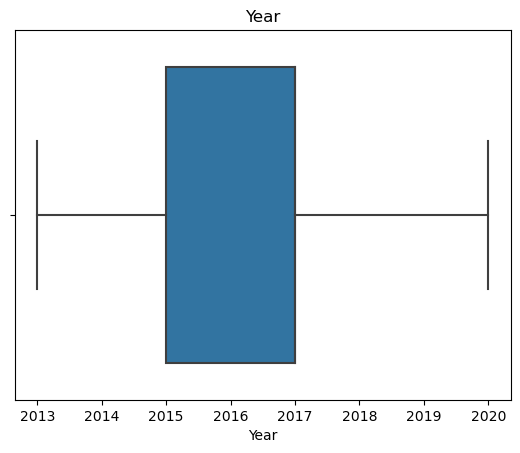

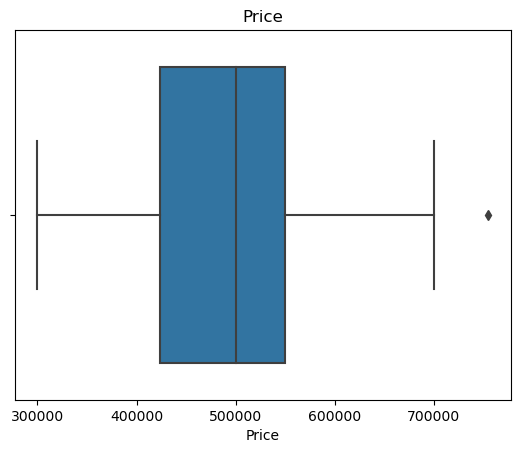

In [15]:
for i in ['Year','Price']:
    plt.figure()
    sns.boxplot(x =data[i])
    plt.title(i)

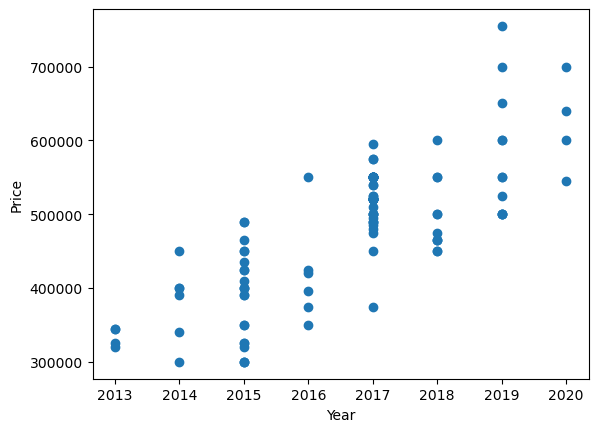

LinearRegression()

In [17]:
# visualize the data
plt.scatter(data['Year'], data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# create a linear regression model
X = data['Year'].values.reshape(-1,1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


In [18]:

# predict the price of a 2022 model
X_new = np.array([[2022]])
lr_pred = lr_model.predict(X_new)
print('Predicted price of a 2022 model: ', lr_pred[0])

# evaluate the linear regression model
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
print('Linear Regression MSE train:', mean_squared_error(y_train, lr_pred_train))
print('Linear Regression R2 score train:', r2_score(y_train, lr_pred_train))
print('Linear Regression MSE test:', mean_squared_error(y_test, lr_pred_test))
print('Linear Regression R2 score test:', r2_score(y_test, lr_pred_test))


Predicted price of a 2022 model:  743601.6159450412
Linear Regression MSE train: 3107285246.1636977
Linear Regression R2 score train: 0.6389354253755697
Linear Regression MSE test: 4326906256.829671
Linear Regression R2 score test: 0.36759313425902185


In [19]:
# create a lasso regression model
alpha = 0.01
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# predict the price of a 2022 model
lasso_pred = lasso_model.predict(X_new)
print('Predicted price of a 2022 model (Lasso): ', lasso_pred[0])

# evaluate the lasso regression model
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
print('Lasso Regression MSE train:', mean_squared_error(y_train, lasso_pred_train))
print('Lasso Regression R2 score train:', r2_score(y_train, lasso_pred_train))
print('Lasso Regression MSE test:', mean_squared_error(y_test, lasso_pred_test))
print('Lasso Regression R2 score test:', r2_score(y_test, lasso_pred_test))

Predicted price of a 2022 model (Lasso):  743601.5935283154
Lasso Regression MSE train: 3107285246.163654
Lasso Regression R2 score train: 0.6389354253755748
Lasso Regression MSE test: 4326905791.966492
Lasso Regression R2 score test: 0.3675932022019466
